# DTEK0042 Exercise 4
    Group Members:
    1. Tiina Nokelainen
    2. Risto Hirvilammi
    3. Oskari Läntinen

*** Note for Google Colab Users ***
     Because Google Colab doesn't have a button to convert your notebook to .html format here is a quick work around:
   1. open a new google colab notebook
   2. in the files section in google colab, upload the .ipynb file you want to be converted to .html
   3. in your new open notebook run this command in an empty cell: !jupyter nbconvert --to html YourFileName.ipynb
   4. after the command is finished running refresh the page
   5. In your files section you should see your original .ipynb file that you uploaded and then a .html file of that same notebook.
   6. download the .html file and you're good to go!

In this exercise, you are required to analyze a SCG signal step-by-step as outlined below.  The deliverables for this exercise are a jupyter notebook and a .html file exported form the notebook. The notebook should includes your code, observations, graphs, and conclusions made upon analyzing the given SCG signals. Please provide caption and description for every figure. 

## 1- library Imports

In [ ]:
#scipy imports
import scipy 
from scipy import signal,stats

#numpy imports
import numpy as np

#matplotlib imports
import matplotlib.pyplot as plt

#sklean imports
from sklearn.decomposition import PCA
from sklearn import preprocessing

#other imports
from glob import glob

# Data Import 
* Load the .txt files of SCG data that are stored in the folder named “dataset” into your python environment.  
* For each .txt data file, select the 3rd column which contains the Z-axis of the SCG signals.
* Two types of data files, Noisy and Normal data.
* Note: the sampling frequency of this signal is 200 Hz. 

        Hint: 
        * to automate the loading process you can get a list of all data file paths using glob package and subsequently load the files in a for loop.  
        * glob(path_to_dataset) to get a list of file paths
        then load the paths one by one in a loop

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:

file_list = glob('/content/drive/My Drive/Biosignals/*_data_[0-9].txt')
file_list.sort()
file_list

['/content/drive/My Drive/Biosignals/Noisy_data_1.txt',
 '/content/drive/My Drive/Biosignals/Noisy_data_2.txt',
 '/content/drive/My Drive/Biosignals/Noisy_data_3.txt',
 '/content/drive/My Drive/Biosignals/Noisy_data_4.txt',
 '/content/drive/My Drive/Biosignals/Normal_data_1.txt',
 '/content/drive/My Drive/Biosignals/Normal_data_2.txt',
 '/content/drive/My Drive/Biosignals/Normal_data_3.txt',
 '/content/drive/My Drive/Biosignals/Normal_data_4.txt']

In [ ]:
noisy_1, noisy_2, noisy_3, noisy_4 = [np.loadtxt(
    i, usecols=(2)) for i in file_list[:4]] 
normal_1, normal_2, normal_3, normal_4 = [np.loadtxt(
    i, usecols=(2)) for i in file_list[4:]]

In [ ]:
file_list[4:]

['/content/drive/My Drive/Biosignals/Normal_data_1.txt',
 '/content/drive/My Drive/Biosignals/Normal_data_2.txt',
 '/content/drive/My Drive/Biosignals/Normal_data_3.txt',
 '/content/drive/My Drive/Biosignals/Normal_data_4.txt']

# Noisy Vs Normal Plotting

* Plot the z-axis SCG signal from the file "Noisy_data_1.txt" and plot the z-axis SCG signal from the file "Normal_data_1.txt" 
* Describe your observations and how the plots differ from one another.


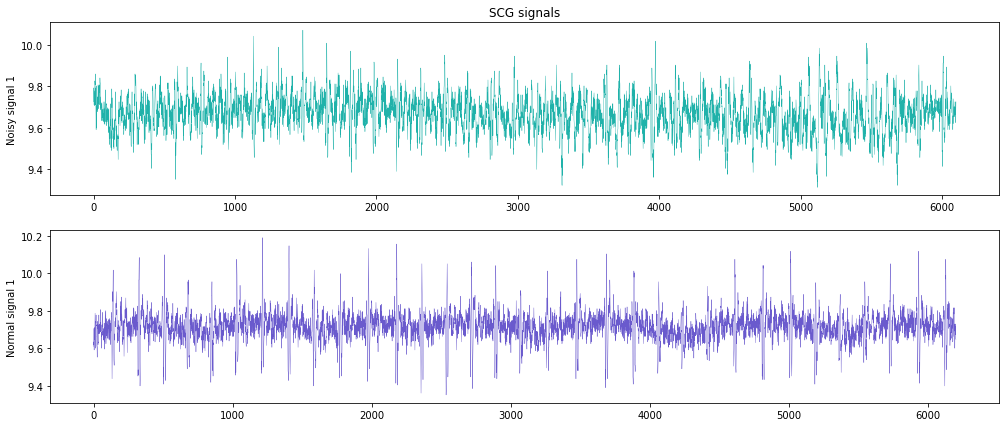

In [ ]:
fig = plt.figure(figsize=(17,7))
plt.subplot(2, 1, 1)
plt.plot(noisy_1, label="noisy data 1", linewidth=0.4, color='lightseagreen')
plt.title('SCG signals')
plt.ylabel('Noisy signal 1')

plt.subplot(2,1,2)
plt.plot(normal_1[:6200], label="normal data 1", 
         linewidth=0.4, color='slateblue')
plt.ylabel('Normal signal 1')
plt.show();

Observations:
Regular peaks are more visible in the normal signal than noisy. 

# Data Segmentation 
* Here is a function to use for data segmentation
* Segment the Z-axis signals into 5-second segments
* The sampling frequency used to record these signals is 200 Hz.
* Store the segments and the accompanying labels

In [ ]:
#code
fs=200 # 5*fs would be 5 seconds
def _slicing(sig, file_label, segment_length = 5*fs):

    sig_sliced = []
    label = []
    
    ########################## slicing 
    
    for i in np.arange(int(len(sig)/segment_length)):

        sig_sliced.append( sig[i*segment_length:(i+1)*segment_length] )

        label.append(file_label)
        
    return (sig_sliced , label)

In [ ]:
noisy_1_seg, labels1 = _slicing(noisy_1, "noisy 1")
noisy_2_seg, labels2 = _slicing(noisy_2, "noisy 2")
noisy_3_seg, labels3 = _slicing(noisy_3, "noisy 3")
noisy_4_seg, labels4 = _slicing(noisy_4, "noisy 4")

normal_1_seg, labels1_1 = _slicing(normal_1, "normal 1")
normal_2_seg, labels2_2 = _slicing(normal_2, "normal 2")
normal_3_seg, labels3_3 = _slicing(normal_3, "normal 3")
normal_4_seg, labels4_4 = _slicing(normal_4, "normal 4")

segments = [noisy_1_seg, noisy_2_seg, noisy_3_seg, noisy_4_seg,
            normal_1_seg, normal_2_seg, normal_3_seg, normal_4_seg]
labels = ["noisy1", "noisy2", "noisy3", "noisy4",
          "normal1", "normal2", "normal3", "normal4"]
          print()

# Feature Extraction Function Creation
*  Define a function and name it “feature_extraction” in which you compute and return the features listed below
    * *Time Domain Features*:  mean, standard deviation, interquartile-range, median, peak-to-peak range, skewness, kurtosis, and root mean square. 
    * *Frequency Domain Features*: power spectral density (using welch function of scipy)
    
    
    * For power spectral density, Calculate the total power spectral density within frequency bins of 4 Hz steps. Discard the frequencies above 40 Hz. Get the power within each bin.

    
        
        Hint:
        
        Reference: https://docs.scipy.org/doc/scipy/reference/stats.html for skewness, kurtosis, interquartile-range(iqr)
        
        Reference: https://numpy.org/doc/stable/reference/routines.statistics.html for other time domain features




In [ ]:
# import argrelextrema for peak detection
from scipy.signal import argrelextrema

def feature_extraction(sig, labels):
  
  ## TIME DOMAIN FEATURES ##
  
  # Mean
  sig_mean = np.mean(sig)
  # Standard deviation
  SD = stats.tstd(sig) 
  # Interquartile-range
  q2, q1 = np.percentile(sig, [75,25]) 
  IQ = q2 - q1
  # Median
  median = np.median(sig)
  # Peak-to-peak range, argrelextrema to detect peaks and 
  # np.diff to calculate range
  peak_to_peak = np.mean(np.diff(argrelextrema(sig,np.greater)[0])) 
  # Skewness
  skewness = stats.skew(sig) 
  #Kurtosis
  kurtosis = stats.kurtosis(sig)
  # Root mean square
  rms = np.sqrt(np.mean(sig**2))
  
  
  
  ## FREQUENCY DOMAIN FEATURE ##

  # transforming to zero mean and unit variance
  transformed_sig = preprocessing.scale(sig)
  
  # PSD on transformed signal
  frequencies , PSD = signal.welch(transformed_sig,fs=200)
  
  # discard freqs above 40 Hz  
  freqs_arr = np.arange(0,41,4) #step size of 4
  
  PSD_binned_sum = [] 
    
  for i in range(freqs_arr.shape[0]-1):
    PSD_binned_sum.append (np.sum(PSD[np.where( (frequencies >= freqs_arr[i] ) & 
                                         ( frequencies < freqs_arr[i+1] ) )]))
  
  # Set psds to individual variables for feature extraction
  PSD4=PSD_binned_sum[0]
  PSD8=PSD_binned_sum[1]
  PSD12=PSD_binned_sum[2]
  PSD16=PSD_binned_sum[3]
  PSD20=PSD_binned_sum[4]
  PSD24=PSD_binned_sum[5]
  PSD28=PSD_binned_sum[6]
  PSD32=PSD_binned_sum[7]
  PSD36=PSD_binned_sum[8]
  PSD40=PSD_binned_sum[9]

  return (sig_mean, SD, IQ, median, peak_to_peak, skewness, kurtosis, rms, 
          PSD4, PSD8, PSD12, PSD16, PSD20, PSD24,  PSD28,  PSD32, PSD36, PSD40)

In [ ]:
# sample code for power spectral density calculation for feature extraction function
# must implement the code below within you feature extraction function. 

# transforming to zero mean and unit variance ONLY DO THIS FOR PSD CALCULATION

##transformed_sig = preprocessing.scale(sig)
        
# PSD on transformed signal
    
##frequencies , PSD = signal.welch(transformed_sig,fs)
    
# discard freqs above 40 Hz 
    
##freqs_arr = np.arange(0,41,4) #step size of 4

##PSD_binned_sum = [] 
    
##for i in range(freqs_arr.shape[0]-1):

        
    ##PSD_binned_sum.append (np.sum(PSD[np.where( (frequencies >= freqs_arr[i] ) & 
     ##                                              ( frequencies < freqs_arr[i+1] ) )]))


* so for each signal segment, you should get back 10 values for the frequency domain features and 8 time domain values so 18 feature variables total for each 5 seconds signal segment

# Feature Extraction Application

* Now call the feature extraction function you created and extract features from every segment that you have obtained in step 3.
* Store the labels and the features you extracted from each segment to numpy arrays. 

In [ ]:
# Exract features by appending to list first and then converting that list to
# a numpy array

features = []
for (i,j) in zip(segments, labels):
  for k in i:
    features.append(feature_extraction(k,labels1))
features = np.array(features)
print(features)

[[9.67437221e+00 8.04923369e-02 1.05347000e-01 ... 2.19296801e-02
  2.25063879e-02 1.68872628e-02]
 [9.69999006e+00 8.55770520e-02 1.00555000e-01 ... 1.34824315e-02
  1.58621633e-02 8.59033238e-03]
 [9.67504716e+00 8.26481258e-02 1.05347000e-01 ... 1.19172281e-02
  2.79769480e-02 9.27078669e-03]
 ...
 [9.31378410e+00 6.64847887e-02 7.66150000e-02 ... 7.07238338e-02
  4.16217551e-02 1.85038743e-02]
 [9.31392306e+00 6.65468260e-02 7.66150000e-02 ... 3.31786391e-02
  2.60606757e-02 5.21515911e-02]
 [9.32148371e+00 6.43813972e-02 8.14060000e-02 ... 2.59901918e-02
  3.77983007e-02 4.86574082e-02]]


# Standardize Features
    Hint:
    use sklearn.preprocessing.scale() to standardize the features
    reference: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html

In [ ]:
#code

features_standardized = preprocessing.scale(features)
#print (features_standardized)

# Principal Component Analysis
* Principal Component Analysis (PCA) is used to reduce the dimensionality of a data set consisting of many variables correlated with each other. This can then be used to visualize the data in a more practical way. 
* Compute the first and 2nd principal components
* Plot the two components on a scatter plot with the coloring done by label
* Are these features useful to seperate the two types of signals (noisy vs normal)?
* Describe your observations.
    
        Hint:
        my_pca=PCA(n_components=2)
        pca_out = my_pca.fit_transform(input)
        plt.scatter() from matplotlib.pyplot can be used to plot scatter plots

In [ ]:
#code

# 18 dimensions are reduced into 2
my_pca=PCA(n_components=2)

pca_out = my_pca.fit_transform(features_standardized)
print (pca_out)


[[ 2.18357341 -0.42110663]
 [ 3.3734949  -1.76319782]
 [ 2.77178613 -1.28732392]
 [ 3.187946    0.50421399]
 [ 2.98976766  0.00937968]
 [ 3.67731339  2.16267137]
 [-0.040555    2.25262012]
 [-1.03779035  2.03126923]
 [-0.46580868  1.96368304]
 [-0.11803309  0.96590198]
 [ 0.15026327  1.27533528]
 [ 0.10429347  1.57418809]
 [ 4.24856807  6.43630389]
 [ 1.17514705  3.13561012]
 [ 2.23203228  3.4172486 ]
 [ 1.3077731   1.52878394]
 [ 4.52904539  5.45086951]
 [ 2.05726973  3.17118235]
 [ 2.94027236  4.39842293]
 [ 2.08201938  3.69501114]
 [-0.32954343  1.61453798]
 [ 0.0410075   1.14413077]
 [-0.24029918  0.68951888]
 [-1.19848438  0.21852937]
 [-2.5224302   0.03082921]
 [ 3.73744783 -3.9870978 ]
 [ 3.8941274  -3.49017794]
 [ 3.5435279  -3.67889683]
 [ 3.43017798 -2.79726336]
 [ 2.86709205 -2.83564661]
 [ 3.29538217 -1.59704087]
 [ 3.20813887 -3.54937017]
 [ 3.22668599 -3.45420358]
 [ 3.19664156 -3.56257504]
 [ 3.86174118 -4.40218893]
 [ 3.02187395 -2.26181982]
 [ 2.92082066 -2.11688164]
 

75

Observations: